In [1]:
# %% Global Variables
datasetPath = "./TM-3-2020"
sourceCodePath = './src'

In [ ]:
!pip install ipywidgets
!pip install sentence_transformers

In [3]:
# %% libraries
import numpy as np
import pandas as pd
import os
import sys
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib
import torch

In [4]:
# %% Loads Source code
sys.path.append(os.path.join(os.getcwd(), sourceCodePath))

In [5]:
import chat as ch

In [6]:
dataset = ch.dataset.Dataset(datasetPath)

In [21]:
cds = np.array([])
ids = np.array([])
speakers = np.array([])
text = np.array([])

for conversation in dataset.jsonObj[:100]:
  for row in conversation['utterances']:
    cds = np.append(cds, conversation['conversation_id'])
    ids = np.append(ids, row['index'])
    speakers = np.append(speakers, row['speaker'])
    text = np.append(text, row['text'])

In [22]:
columns = np.array([cds, ids, speakers, text]).T
df = pd.DataFrame(data=columns, columns=['conversation_id', 'index', 'speaker', 'text'])

In [65]:
df.head()

,conversation_id,index,speaker,text
0,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,0.0,user,hi....am buying a ticket tonight so we go and ...
1,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,1.0,assistant,No problem. Is there a particular type of movi...
2,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,2.0,user,hhhmmmmm not at all. i dont have any in mind f...
3,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,3.0,assistant,Sure. I can help with that. Let me listings at...
4,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,4.0,user,sure you can but i want to see the movie at AM...


In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

In [66]:
#Compute embedding for both lists
embeddings1 = model.encode(df['text'], convert_to_tensor=True)


In [99]:
ìtems = embeddings1.to('cpu').detach().numpy()
ìtems.shape

(3915, 384)

centers: 8 [[-0.03964424 -0.00852903 -0.0012597  ... -0.01610262 -0.00106519
  -0.00051187]
 [ 0.03149117 -0.05690195 -0.02232837 ... -0.02852353 -0.02894571
   0.05030629]
 [ 0.04646302 -0.01601511  0.0132764  ... -0.03890727 -0.02240095
   0.00471354]
 ...
 [-0.04730122 -0.07472088 -0.02443832 ... -0.01956946 -0.01244697
   0.01395692]
 [-0.00582612 -0.00466491  0.03340185 ... -0.01482481 -0.05176684
   0.01754049]
 [-0.041918   -0.00684674 -0.02065778 ... -0.02506913  0.00816465
   0.03188334]]
labels:  3915 [1 5 0 ... 4 0 6]


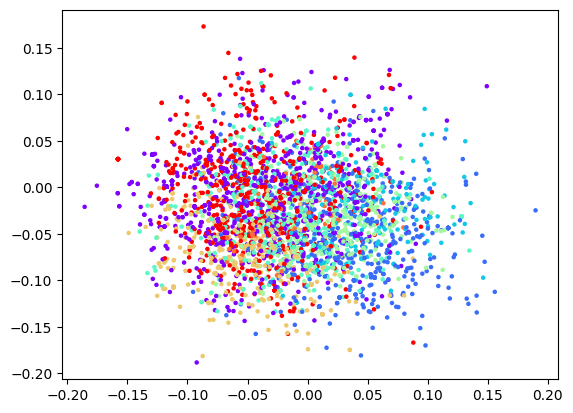

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# default 8 clasess plot
kmeans = KMeans(n_clusters=8)
kmeans.fit(ìtems)

print('centers:', len(kmeans.cluster_centers_),kmeans.cluster_centers_)
print('labels: ',len(kmeans.labels_), kmeans.labels_)

plt.scatter(ìtems[:,0],ìtems[:,1], c=kmeans.labels_, cmap='rainbow', s=5)

data = ìtems
labels = kmeans.labels_

In [121]:
 #dinamic best # clasess
ìtems = embeddings1.to('cpu').detach().numpy()
wcss = [] 
for number_of_clusters in range(1,80): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
    kmeans.fit(ìtems) 
    wcss.append(kmeans.inertia_)
wcss

[3160.13427734375,
 2943.8544921875,
 2776.78662109375,
 2679.47607421875,
 2615.30908203125,
 2551.363525390625,
 2504.393798828125,
 2455.1337890625,
 2416.091552734375,
 2372.465576171875,
 2335.627197265625,
 2302.246826171875,
 2265.806640625,
 2232.836181640625,
 2226.205322265625,
 2186.90185546875,
 2173.249267578125,
 2142.61474609375,
 2132.18017578125,
 2100.6494140625,
 2086.1904296875,
 2060.998291015625,
 2041.669189453125,
 2023.1817626953125,
 2006.53759765625,
 1999.6298828125,
 1977.6923828125,
 1968.433837890625,
 1946.16015625,
 1940.33251953125,
 1927.294921875,
 1922.4307861328125,
 1903.881591796875,
 1886.840087890625,
 1880.5286865234375,
 1868.3614501953125,
 1848.125244140625,
 1840.71826171875,
 1832.7017822265625,
 1827.2022705078125,
 1823.3785400390625,
 1811.4500732421875,
 1791.3614501953125,
 1787.989501953125,
 1773.82763671875,
 1766.8717041015625,
 1754.262939453125,
 1751.782470703125,
 1743.1065673828125,
 1743.9664306640625,
 1734.946533203125,
 

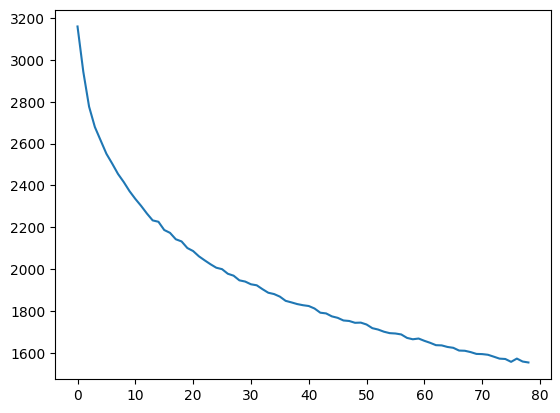

In [122]:
plt.plot(range(len(wcss)), wcss)

In [128]:
best_cluster_number = 60

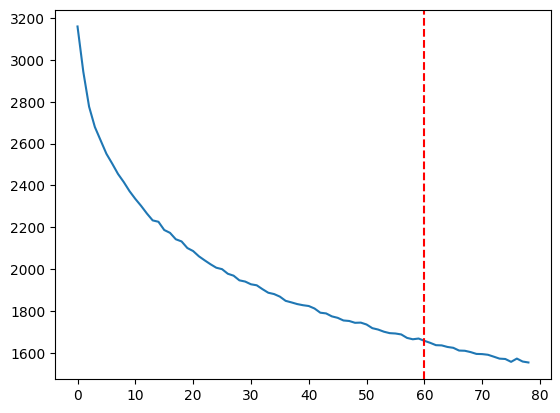

In [129]:
plt.plot(range(len(wcss)), wcss)
plt.axvline(best_cluster_number, linestyle='--', color='r')

<AxesSubplot: >

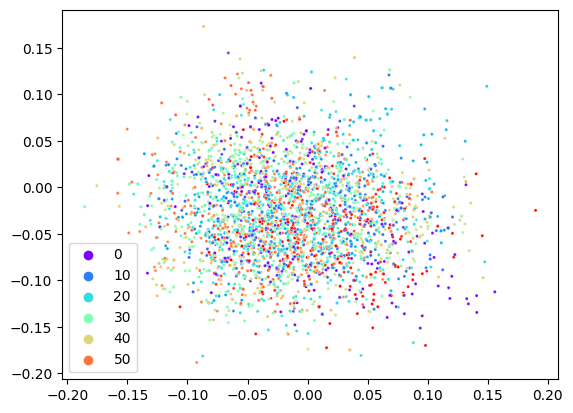

In [135]:
ìtems = embeddings1.to('cpu').detach().numpy()
kmeans = KMeans(n_clusters=best_cluster_number, random_state=42)
kmeans.fit(ìtems)
sns.scatterplot(x = ìtems[:,0], y = ìtems[:,1], hue=kmeans.labels_,palette="rainbow", s=5)

In [131]:
df['intent'] = kmeans.labels_

In [132]:
df.head()

,conversation_id,index,speaker,text,intent
0,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,0.0,user,hi....am buying a ticket tonight so we go and ...,34
1,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,1.0,assistant,No problem. Is there a particular type of movi...,21
2,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,2.0,user,hhhmmmmm not at all. i dont have any in mind f...,29
3,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,3.0,assistant,Sure. I can help with that. Let me listings at...,53
4,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,4.0,user,sure you can but i want to see the movie at AM...,34


In [146]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
pca_items= pca.fit_transform(ìtems)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.08851344 0.06764173]
[16.724659 14.620425]


<AxesSubplot: >

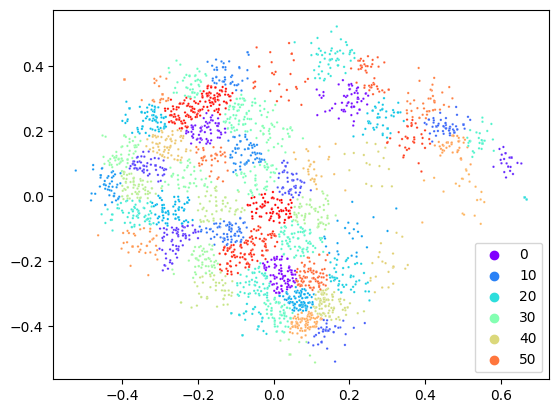

In [150]:
kmeans = KMeans(n_clusters=best_cluster_number, random_state=42)
kmeans.fit(pca_items)
sns.scatterplot(x = pca_items[:,0], y = pca_items[:,1], hue=kmeans.labels_,palette="rainbow", s=3)

In [148]:
df['intent'] = kmeans.labels_

In [149]:
df.head(20)

,conversation_id,index,speaker,text,intent
0,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,0.0,user,hi....am buying a ticket tonight so we go and ...,10
1,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,1.0,assistant,No problem. Is there a particular type of movi...,5
2,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,2.0,user,hhhmmmmm not at all. i dont have any in mind f...,26
3,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,3.0,assistant,Sure. I can help with that. Let me listings at...,11
4,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,4.0,user,sure you can but i want to see the movie at AM...,28
5,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,5.0,assistant,"Oh, sorry about that. So you’re interested in ...",2
6,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,6.0,user,yeah,7
7,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,7.0,assistant,OK. I show one action movie playing at AMC Mou...,58
8,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,8.0,user,yeah but 9.10pm will be perfect for me,6
9,dlg-bca5ce0a-056f-446e-be94-3ba77b32a84f,9.0,assistant,Great. And how many tickets?,8
